<a href="https://colab.research.google.com/github/Kritika1204/Coding-Blocks-ML-Course-Projects/blob/master/Challange_Hardwork_pays_off.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Challenge - Hardwork Pays Off

Predicting Exam Scores using Machine Learning

**In this challenge, we have a walkatime data of the students and how they performed in the evaluation exam.Our task is to predict the score and will get given the amount of time you spend on coding daily.**

Input: We are given one feature corresponding to time noted by walkatime.

Output: A scalar denoting the level of perfomance student achived by devoting the given time.

In [1]:
# Importing inmportant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Loading the dataset
X = pd.read_csv("Linear_X_Train.csv")
y = pd.read_csv("Linear_Y_Train.csv")
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [ ]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


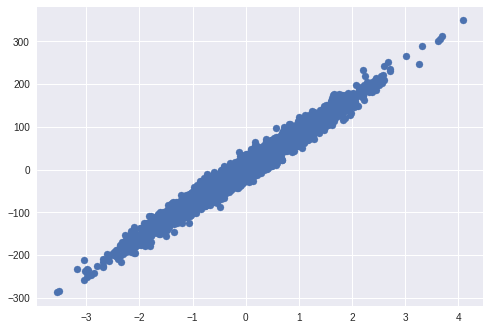

In [4]:
# Scatter plot for visualising the data
plt.scatter(X,y)
plt.style.use("seaborn")
plt.show()

In [5]:
# Coverting the data to numpy arrays
X = X.values
y = y.values

In [21]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list



In [22]:
theta,error_list,theta_list = gradientDescent(X,y)

In [23]:
theta

array([ 3.72687896, 80.54086647])

In [24]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


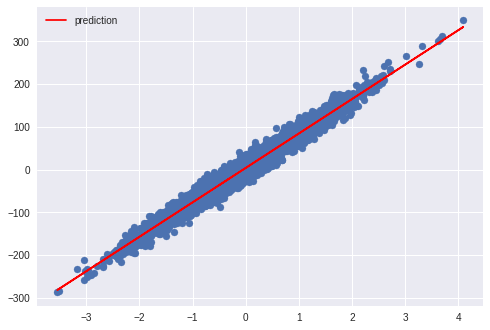

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_,color = 'red',label="prediction")
plt.legend()
plt.show()

In [ ]:
X_test = pd.read_csv('Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [ ]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [ ]:
df.to_csv('y_prediction.csv',index=False)

Visualising Loss Function

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
 #Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

#print(J.shape)

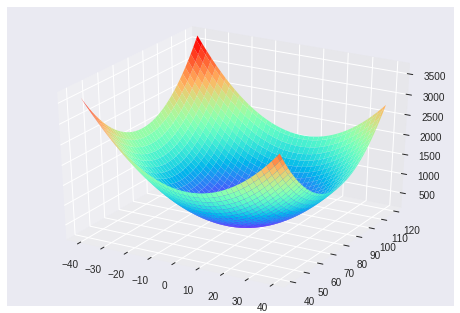

In [13]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

Computing Score

In [25]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [26]:
r2_score(y,y_)

97.09612220841039